In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc
    
GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nlh/'
''' If SSL error _ssl.c:997: 
    pip install --upgrade certifi'''

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


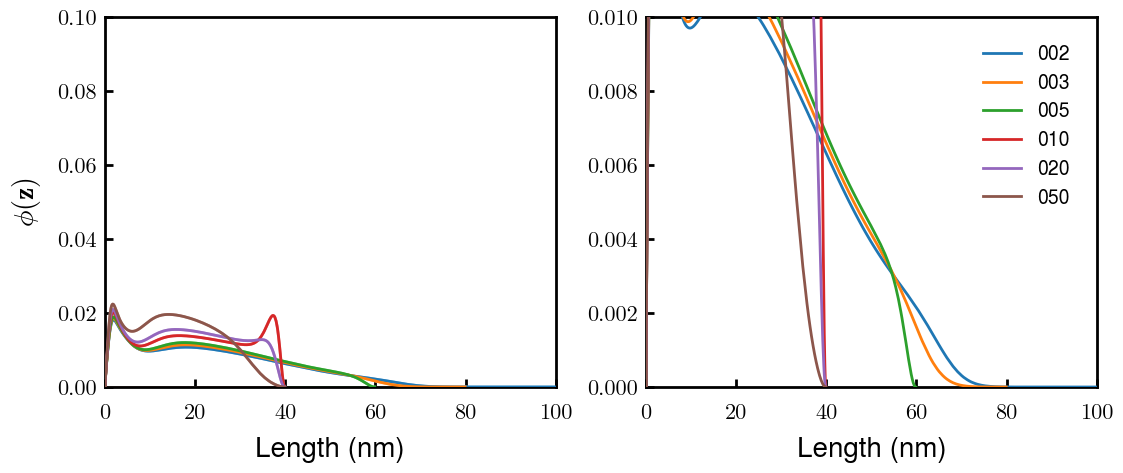

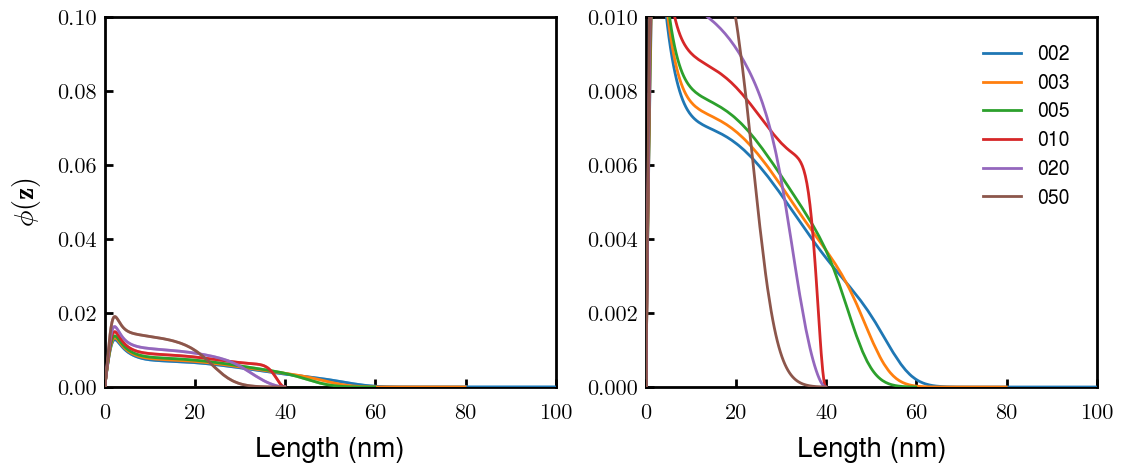

In [11]:
# labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
# labs_mod = ['002']+labs[1:]
# thresh = 3.0e-03
labs_mod = ['002', '003', '005', '010', '020', '050']
labs = labs_mod
read_list = [GIT+"phb60v05_c"+i+"_pcm250.dat" for i in labs_mod]
block_Ni = [[7,1]]*len(read_list)
read_list2= [GIT+"phb60v05D2_c"+i+"_pcm250.dat" for i in labs_mod]
block_Ni2= [[5,1]]*len(read_list)

fig, ax = tjy.plot_pha(read_list, x1_end=100, y1_end=0.1, x2_end=100, y2_end=0.010, #block2=3,
                       block_Ni=block_Ni, labs=labs, double=True, show=False)
fig, ax = tjy.plot_pha(read_list2,x1_end=100, y1_end=0.1, x2_end=100, y2_end=0.010, #block2=3,
                       block_Ni=block_Ni2,labs=labs, double=True, show=False)
# plt.plot([0,25], np.ones(2)*thresh)
plt.show()

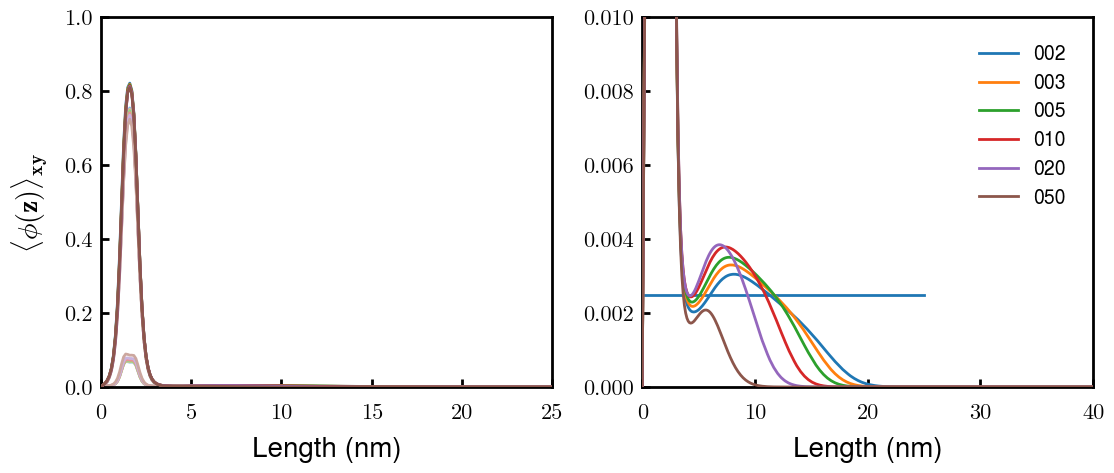

In [8]:
# labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
# labs_mod = ['002']+labs[1:]
thresh = 2.5e-03
labs_mod = ['002', '003', '005', '010', '020', '050']
labs = labs_mod
read_list = [GIT+"ph2a1E_c"+i+".dat" for i in labs_mod]
block_Ni = [[4,7]]*len(read_list)

fig, ax = tjy.plot_pha(read_list, x1_end=25, x2_end=40, y2_end=0.010, #block2=3,
                       block_Ni=block_Ni, labs=labs, double=True, show=False)
plt.sca(ax[1])
plt.plot([0,25], np.ones(2)*thresh)
plt.show()

In [2]:
class Heights:
    def __init__(self, name, bv, name2=''):
        self.name = name
        self.bv   = bv
        self.name2= name2
        self.labs =  ['0015', '003', '005', '007', '010', '020', '050', '150', '600']
        self.labs_mod = ['002']+self.labs[1:]
        self.alg    = 'thresh'
        self.thresh = 1e-06
        
    def Calc_H(self, silent=True):
        algs = ['thresh', 'maxpt', 'norm']
        flist = ['ph{}_c'.format(self.name)+i+self.name2+'.dat' for i in self.labs_mod]
        flist = [GIT+i for i in flist] 
        self.df = pd.DataFrame([np.zeros(len(flist))]*5, index=['cs', 'kapd']+algs).transpose()
        self.df.iloc[:,0] = [1.5]+[float(i) for i in self.labs[1:]]
        self.df.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in self.df.cs]
        for i in range(len(flist)): self.df.iloc[i, 2] = tjy.H_find(flist[i], alg=self.alg, thresh=self.thresh)
        
        self.cs = self.df.cs
        self.thresh = self.df.thresh
        
        if not silent: print('{} Calc_H done.'.format(self.name+self.name2), end=" ")

b60v05_cm250 Calc_H done. b60v05_cm300 Calc_H done. b60v05D2_cm250 Calc_H done. b60v05D2_cm300 Calc_H done. b60v05_pcm250 Calc_H done. b60v05_pcm300 Calc_H done. b60v05D2_pcm250 Calc_H done. b60v05D2_pcm300 Calc_H done. 

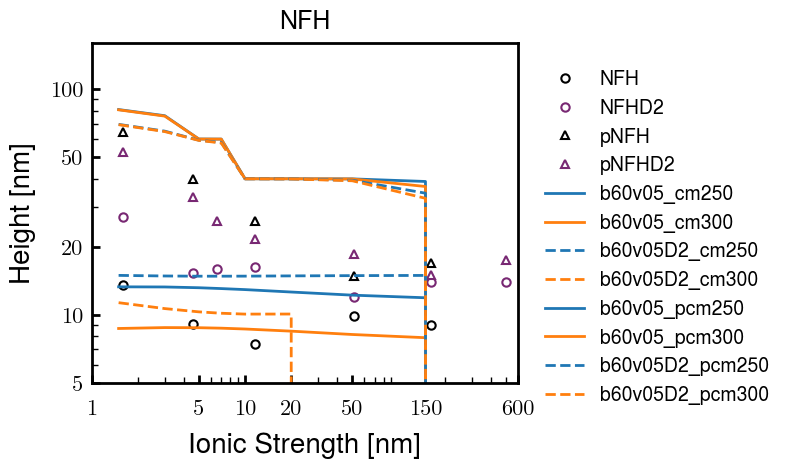

In [13]:
## Data import
import EAD_final as EAD
dfs = {'NFH': [EAD.HSA1, EAD.HSA2],
       'NFHD2': [EAD.HSAD2_1, EAD.HSAD2_2],
       'pNFH': [EAD.pHSA1, EAD.pHSA2],
       'pNFHD2': [EAD.pHSAD2_1, EAD.pHSAD2_2]}

name1 = ['b60v05']*4
name2 = ['_cm250', '_cm300', '_cm350']
name3 = ['_pcm250', '_pcm300']
    
h1 = Heights(name1[0], (0.4, 0.15), name2=name2[0])
h2 = Heights(name1[1], (0.4, 0.15), name2=name2[1])
# h3 = Heights(name1[2], (0.4, 0.15), name2=name2[2])
# h4 = Heights(name1[3], (0.4, 0.15), name2=name2[3])
hs = [h1, h2]#, h3]# h4]
for i in hs: i.Calc_H(silent=False)

hD1 = Heights(name1[0]+'D2', (0.4, 0.15), name2=name2[0])
hD2 = Heights(name1[1]+'D2', (0.4, 0.15), name2=name2[1])
# hD3 = Heights(name1[2]+'D2', (0.4, 0.15), name2=name2[2])
hDs = [hD1, hD2]
for i in hDs: i.Calc_H(silent=False)

ph1 = Heights(name1[0], (0.4, 0.15), name2=name3[0])
ph2 = Heights(name1[1], (0.4, 0.15), name2=name3[1])
phs = [ph1, ph2]
for i in phs: i.Calc_H(silent=False)

phD1 = Heights(name1[0]+'D2', (0.4, 0.15), name2=name3[0])
phD2 = Heights(name1[1]+'D2', (0.4, 0.15), name2=name3[1])
phDs = [phD1, phD2]
for i in phDs: i.Calc_H(silent=False)

## Figure Initialization
f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)

for name, files in dfs.items():
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    if 'p' in name: marker = '^'
    else:           marker = 'o'
    if 'D2' in name: mec = mix_purp
    else:            mec = 'k'
    plt.plot(files[0].cs, avg, marker, markerfacecolor='w', markeredgecolor=mec, label=name)

COLORS = ['C0', 'C1', 'C2', 'C3', 'C4']
for ind,i in enumerate(hs ): plt.plot(i.cs, i.thresh, ls='-',  c=COLORS[ind], label=i.name+i.name2)
for ind,i in enumerate(hDs): plt.plot(i.cs, i.thresh, ls='--', c=COLORS[ind], label=i.name+i.name2)
for ind,i in enumerate(phs): plt.plot(i.cs, i.thresh, ls='-',  c=COLORS[ind], label=i.name+i.name2)
for ind,i in enumerate(phDs):plt.plot(i.cs, i.thresh, ls='--', c=COLORS[ind], label=i.name+i.name2)

## Data Plotting 
plt.title(r"NFH", fontsize=18)
plt.ylabel('Height' ' [nm]')
plt.xlabel(r'Ionic Strength [nm]')
plt.xlim(1, 220)
plt.xscale('log')
plt.ylim(5.0, 160)
plt.yscale('log')
plt.yticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])
plt.xticks([1, 5, 10, 20, 50, 150, 600], [1, 5, 10, 20, 50, 150, 600])
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
tjy.ticks()
plt.show()

In [4]:
print('Class init start.', end=" ")
l1 = Heights('553', (0.5, 0.15))
l2 = Heights('513', (0.5, 0.10))
l3 = Heights('453', (0.4, 0.15))
l4 = Heights('413', (0.4, 0.10))
l5 = Heights('353', (0.3, 0.15))
l6 = Heights('323', (0.3, 0.20))
l7 = Heights('325', (0.3, 0.25))
l8 = Heights('423', (0.4, 0.20))
l9 = Heights('223', (0.2, 0.20))
l10= Heights('352', (0.35,0.20))
l11= Heights('355', (0.35,0.25))
l12= Heights('3530',(0.35,0.30))
l13= Heights('3535',(0.35,0.35))
l14= Heights('4035',(0.40,0.35))
l15= Heights('4535',(0.45,0.35))
ls = [l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15]
for i in ls: i.Calc_H(silent=False)
print('\nClass init end.')

Class init start. 553 Calc_H done. 513 Calc_H done. 453 Calc_H done. 413 Calc_H done. 353 Calc_H done. 323 Calc_H done. 325 Calc_H done. 423 Calc_H done. 223 Calc_H done. 352 Calc_H done. 355 Calc_H done. 3530 Calc_H done. 3535 Calc_H done. 4035 Calc_H done. 4535 Calc_H done. 
Class init end.


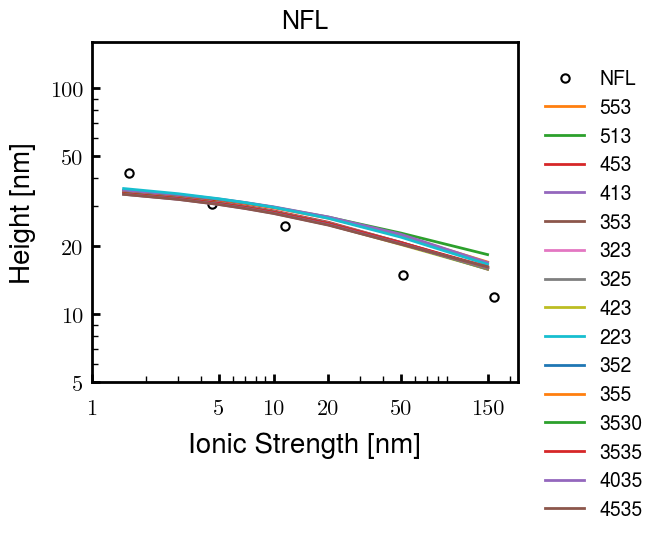

In [5]:
## Data import
import EAD_final as EAD
dfs = {'NFL': [EAD.LSA1, EAD.LSA2, EAD.LSA3, EAD.LSA4]}

## Figure Initialization
f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)

for name, files in dfs.items():
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    plt.plot(files[0].cs, avg, 'o', markerfacecolor='w', markeredgecolor='k', label=name)

    plt.title(r"NFL", fontsize=18)
    plt.ylabel('Height' ' [nm]')
    plt.xlabel(r'Ionic Strength [nm]')
    plt.xticks([0, 2, 4, 6, 8])
    
for i in ls:
    plt.plot(i.cs, i.thresh, label=i.name)

## Data Plotting 
text_loc = (0.50, 0.92)
text_kw = {'fontsize':  14,
           'ha':        'center',
           'va':        'center', 
           'bbox':      dict(boxstyle='square', facecolor='none', edgecolor='none')}
L_kw = {'color': cool_blue, 'marker': 'x'}
Lx_kw = {'color': mix_purp, 'marker': 'x'}
H_kw = {'color': warm_red}#,  'marker': 'x'}

plt.xlim(1, 220)
plt.xscale('log')
plt.ylim(5.0, 160)
plt.yscale('log')
plt.yticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])
plt.xticks([1, 5, 10, 20, 50, 150], [1, 5, 10, 20, 50, 150])
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
tjy.ticks()
plt.show()

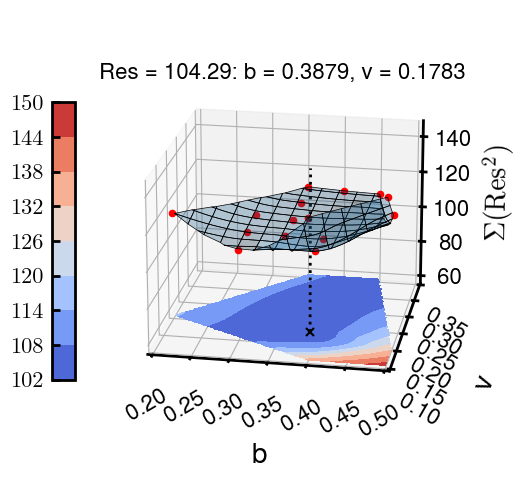

In [116]:
# Newton-Raphson Optimization 
## Experimental Data
import EAD_final as EAD
df = {'NFL': [EAD.LSA1, EAD.LSA2, EAD.LSA3, EAD.LSA4]}
for name, files in df.items():
    cs = files[0].cs
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    new = pd.DataFrame({'cs': cs, 'h':avg})

## Objective Function
from scipy.interpolate import griddata, CubicSpline

df0 = new
def f(df): 
    global df0
    df_poly = CubicSpline(df.cs, df.thresh)
    hpoly = df_poly(df0.cs)
    sum_res = sum( [(hpoly[i] - df0.h[i])**2 for i in range(len(df0.cs))] )
    return sum_res 

bvs = np.array([i.bv for i in ls])
Rs  = np.array([f(i) for i in ls])

ax = plt.figure(figsize=(7,6)).add_subplot(projection='3d', computed_zorder=False)
ax.view_init(elev=20, azim=-80)

bmin, bmax, vmin, vmax = 1000, 0, 1000, 0
for i in range(len(ls)): 
    ax.scatter(*bvs[i], f(ls[i]), c='r')
    if bvs[i][0] < bmin: bmin = bvs[i][0]
    if bvs[i][0] > bmax: bmax = bvs[i][0]
    if bvs[i][1] < vmin: vmin = bvs[i][1]
    if bvs[i][1] > vmax: vmax = bvs[i][1]
    
extrf = 0.50 
bmesh, vmesh = np.mgrid[bmin:bmax:100j, vmin:vmax:100j]
res = griddata(bvs, Rs, (bmesh, vmesh), method='cubic')
zips = zip(*np.where(res==np.nanmin(res)))
b_ind, v_ind = next(zips)

# # Plot the 3D surface
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
hmin = 0.55*min(np.nanmin(res), min(Rs))
hmax = max(np.nanmax(res), max(Rs))
ax.plot_surface(bmesh, vmesh, res, edgecolor='k', lw=0.5, rstride=8, cstride=8, alpha=0.3, zorder=3)
ax.text2D(0.5, 0.85, 'Res = {:.2f}: b = {:.4f}, v = {:.4f}'.format(res[b_ind][v_ind], bmesh[b_ind][0], vmesh[0][v_ind]), fontsize=16, transform=ax.transAxes, horizontalalignment='center')
plt.xticks(rotation=30)
plt.yticks(rotation=-30)
s = ax.contourf(bmesh, vmesh, res, zdir='z', offset=hmin, cmap='coolwarm', zorder=2)
axins = inset_axes(ax, width="5%", height="60%", loc='center left', borderpad=0)
plt.colorbar(s, cax=axins, orientation='vertical', ticklocation='left')
ax.plot(bmesh[b_ind][0]*np.array([1,1]), vmesh[0][v_ind]*np.array([1,1]), [hmin, hmax], 'k:')
ax.plot(bmesh[b_ind][0], vmesh[0][v_ind], 'kx', zdir='z', zs=hmin)
ax.set(xlabel='\n\n\nb', ylabel='\n\n\nv   ', zlabel='\n\n'r'$\Sigma(\mathrm{Res}^2)$',
          xlim = (bmin, bmax), ylim = (vmin, vmax), zlim = (hmin, hmax))
ax.set_box_aspect((4,4,3), zoom=0.8)
tjy.ticks()
plt.show()

M1 Calc_H done. pM2 Calc_H done. pM3175 Calc_H done. pM315 Calc_H done. 

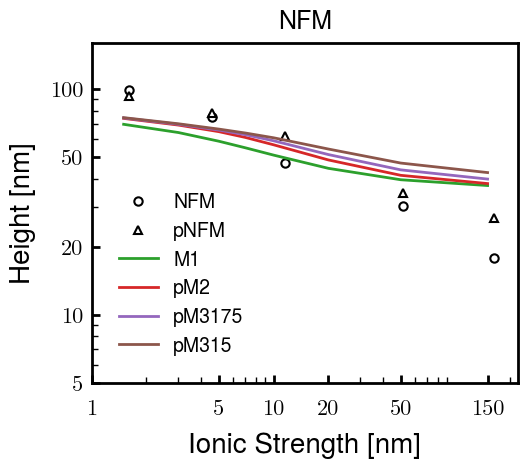

In [6]:
## Data import
import EAD_final as EAD
dfs = {'NFM': [EAD.MSA1, EAD.MSA2],
       'pNFM':[EAD.pMSA1,EAD.pMSA2]}

m1 = Heights('M1', (3.0, 2.0))
for i in [m1]: i.Calc_H(silent=False)

pm1 = Heights('pM2', (3.0, 2.0))
pm2 = Heights('pM3175', (3.0, 1.75))
pm3 = Heights('pM315',  (3.0, 1.50))
pms = [pm1, pm2, pm3]
for i in pms: i.Calc_H(silent=False)

## Figure Initialization
f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)

for name, files in dfs.items():
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    if 'p' in name: marker = '^'
    else: marker = 'o'
    plt.plot(files[0].cs, avg, marker, markerfacecolor='w', markeredgecolor='k', label=name)

plt.plot(m1.cs, m1.thresh, label=m1.name)
for i in pms: plt.plot(i.cs, i.thresh,label=i.name)

## Data Plotting 
plt.title(r"NFM", fontsize=18)
plt.ylabel('Height' ' [nm]')
plt.xlabel(r'Ionic Strength [nm]')
plt.xlim(1, 220)
plt.xscale('log')
plt.ylim(5.0, 160)
plt.yscale('log')
plt.yticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])
plt.xticks([1, 5, 10, 20, 50, 150], [1, 5, 10, 20, 50, 150])
plt.legend()
tjy.ticks()
plt.show()

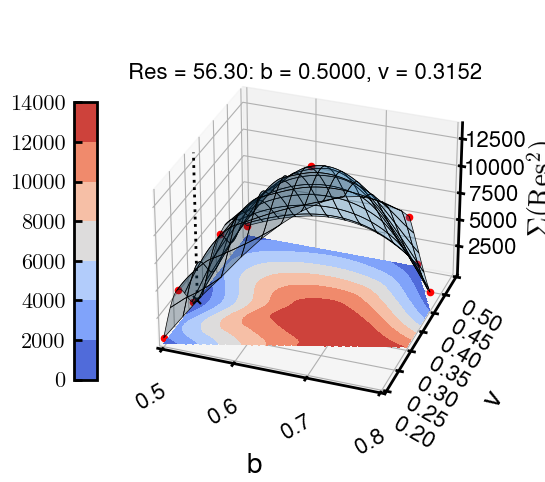

In [25]:
# Newton-Raphson Optimization 
## Experimental Data
import EAD_final as EAD
df = {'pNFH':[EAD.pHSA1,EAD.pHSA2]}
for name, files in df.items():
    cs = files[0].cs
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    new = pd.DataFrame({'cs': cs, 'h':avg})

## Objective Function
from scipy.interpolate import griddata, CubicSpline

df0 = new
def f(df): 
    global df0
    df_poly = CubicSpline(df.cs, df.thresh)
    hpoly = df_poly(df0.cs)
    sum_res = sum( [(hpoly[i] - df0.h[i])**2 for i in range(len(df0.cs))] )
    return sum_res 

bvs = np.array([i.bv for i in phs])
Rs  = np.array([f(i) for i in phs])

ax = plt.figure(figsize=(7,6)).add_subplot(projection='3d', computed_zorder=False)
ax.view_init(elev=30, azim=-70)

bmin, bmax, vmin, vmax = 1000, 0, 1000, 0
for i in range(len(phs)): 
    ax.scatter(*bvs[i], f(phs[i]), c='r')
    if bvs[i][0] < bmin: bmin = bvs[i][0]
    if bvs[i][0] > bmax: bmax = bvs[i][0]
    if bvs[i][1] < vmin: vmin = bvs[i][1]
    if bvs[i][1] > vmax: vmax = bvs[i][1]
    
extrf = 0.50 
bmesh, vmesh = np.mgrid[bmin:bmax:100j, vmin:vmax:100j]
res = griddata(bvs, Rs, (bmesh, vmesh), method='cubic')
zips = zip(*np.where(res==np.nanmin(res)))
b_ind, v_ind = next(zips)

# # Plot the 3D surface
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
hmin = 0.55*min(np.nanmin(res), min(Rs))
hmax = max(np.nanmax(res), max(Rs))
ax.plot_surface(bmesh, vmesh, res, edgecolor='k', lw=0.5, rstride=8, cstride=8, alpha=0.3, zorder=3)
ax.text2D(0.5, 0.85, 'Res = {:.2f}: b = {:.4f}, v = {:.4f}'.format(res[b_ind][v_ind], bmesh[b_ind][0], vmesh[0][v_ind]), fontsize=16, transform=ax.transAxes, horizontalalignment='center')
plt.xticks(rotation=30)
plt.yticks(rotation=-30)
s = ax.contourf(bmesh, vmesh, res, zdir='z', offset=hmin, cmap='coolwarm', zorder=2)
axins = inset_axes(ax, width="5%", height="60%", loc='center left', borderpad=0)
plt.colorbar(s, cax=axins, orientation='vertical', ticklocation='left')
ax.plot(bmesh[b_ind][0]*np.array([1,1]), vmesh[0][v_ind]*np.array([1,1]), [hmin, hmax], 'k:')
ax.plot(bmesh[b_ind][0], vmesh[0][v_ind], 'kx', zdir='z', zs=hmin)
ax.set(xlabel='\n\n\nb', ylabel='\n\n\nv   ', zlabel='\n\n'r'$\Sigma(\mathrm{Res}^2)$',
          xlim = (bmin, bmax), ylim = (vmin, vmax), zlim = (hmin, hmax))
ax.set_box_aspect((4,4,3), zoom=0.8)
tjy.ticks()
plt.show()

pH530 Calc_H done. p0NFH Calc_H done. p1NFH Calc_H done. 

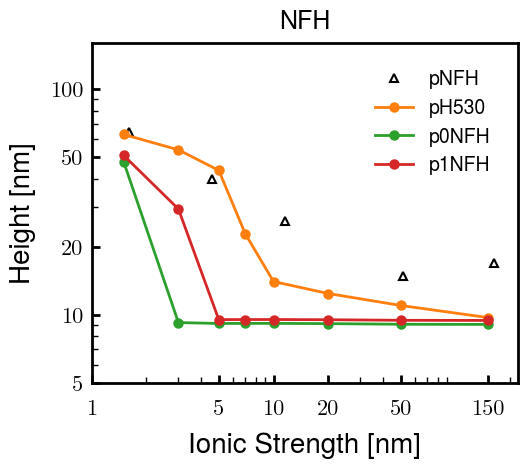

In [16]:
## Data import
import EAD_final as EAD
dfs = {'pNFH':[EAD.pHSA1,EAD.pHSA2]}

ph1 = Heights('pH530', (0.5, 0.30))
ph2 = Heights('p0NFH', (0.5, 0.30))
ph3 = Heights('p1NFH', (0.5, 0.30))

phs = [ph1, ph2, ph3]
for i in phs: i.Calc_H(silent=False)

## Figure Initialization
f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)

for name, files in dfs.items():
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    if 'p' in name: marker = '^'
    else: marker = 'o'
    plt.plot(files[0].cs, avg, marker, markerfacecolor='w', markeredgecolor='k', label=name)

for i in phs: plt.plot(i.cs, i.thresh, '-o', label=i.name)

## Data Plotting 
plt.title(r"NFH", fontsize=18)
plt.ylabel('Height' ' [nm]')
plt.xlabel(r'Ionic Strength [nm]')
plt.xlim(1, 220)
plt.xscale('log')
plt.ylim(5.0, 160)
plt.yscale('log')
plt.yticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])
plt.xticks([1, 5, 10, 20, 50, 150], [1, 5, 10, 20, 50, 150])
plt.legend()
tjy.ticks()
plt.show()

In [36]:
import EAD_final as EAD
import EAD_p as p
dfs = {'pNFL': [EAD.pLSA1, EAD.pLSA2, EAD.pLSA3, EAD.pLSA4],
       'NFL':  [EAD.LSA1, EAD.LSA2, EAD.LSA3, EAD.LSA4],
       'pNFM': [EAD.pMSA1, EAD.pMSA2],
       'NFM' : [EAD.MSA1, EAD.MSA2],
       'pNFH': [EAD.pHSA1, EAD.pHSA2],
       'NFH':  [EAD.HSA1, EAD.HSA2],
       # 'pNFH_old': [p.pLSA00_1, p.pLSA00_2],
      } 

NFL  = Heights('325',   (0.3, 0.25))
NFM  = Heights('M1',    (3.0, 2.00))
pNFM = Heights('pM2',   (3.0, 2.00))
NFH  = Heights('H830',  (0.8, 0.30))
pNFH = Heights('pH820', (0.8, 0.20))

for i in [NFL, NFM, pNFM, NFH, pNFH]: 
    i.thresh = 5e-06
    i.Calc_H(silent=False)

def get_kw(name): 
    if    'M' in name: c  = warm_red
    elif  'H' in name: c  = cool_blue
    elif  'L' in name: c = mix_purp
    else: print("NO MATCH")
    if 'Predicted' in name: 
        if 'p' in name: ls = '--'
        else:           ls = '-'
        m  = 'none'
    else:                   
        ls = 'none'
        if 'p' in name: m = '^'
        else:           m = 'o'
    return name, {'marker': m, 'color': c, 'ls': ls, 'markerfacecolor':'w'}

325 Calc_H done. M1 Calc_H done. pM2 Calc_H done. H830 Calc_H done. pH820 Calc_H done. 

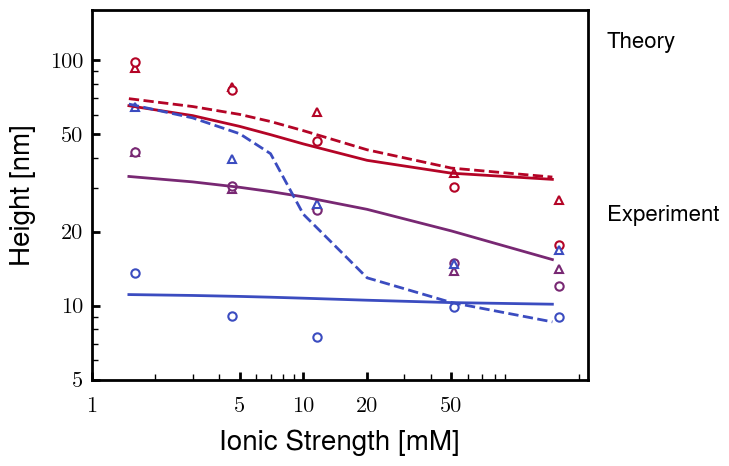

In [38]:
f, ax = plt.subplots(1,1)
for name, files in dfs.items():
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    name, kw = get_kw(name)
    plt.plot(files[0].cs, avg, **kw, label='_name')
    
name, kw = get_kw('Predicted NFL')
plt.plot(NFL.cs, NFL.thresh, **kw, label='_name') # 
name, kw = get_kw('Predicted NFM')
plt.plot(NFM.cs, NFM.thresh, **kw, label='_name') # 
name, kw = get_kw('Predicted pNFM')
plt.plot(pNFM.cs, pNFM.thresh, **kw, label='_name') # 
name, kw = get_kw('Predicted NFH')
plt.plot(NFH.cs, NFH.thresh, **kw, label='_name') # 
name, kw = get_kw('Predicted pNFH')
plt.plot(pNFH.cs, pNFH.thresh, **kw, label='_name') # 

# agscale_x = np.arange(1.5, 50, 0.1)
# agscale_y = np.power(agscale_x, -1/3)
# plt.plot(agscale_x, 9 *agscale_y, ':k') 
# plt.plot(agscale_x, 70 *agscale_y, ':k') 
# plt.plot(agscale_x, 120*agscale_y, ':k') 
# plt.text(1.7, 35, r'$\sim I^{-1/3}$', fontsize=16)

plt.text(0.93,0.80, 'Theory',     transform=f.transFigure, fontsize=16)
plt.text(0.93,0.44, 'Experiment', transform=f.transFigure, fontsize=16)
blank = Line2D([0],[0],ls='none')
handles = [blank, Line2D([0],[0], ls='--', c=warm_red, lw=2), Line2D([0],[0], ls='-', c=warm_red, lw=2)]
labels   = [ " "  , "pNFM", "NFM"] 
handles.extend([Line2D([0],[0], ls='--', c=cool_blue, lw=2), Line2D([0],[0], ls='-', c=cool_blue, lw=2)])
labels.extend([ "pNFH", "NFH"])    
handles.extend([blank, blank, Line2D([0],[0], ls='none', marker='^', c='k', markerfacecolor='w', lw=2), Line2D([0],[0], ls= 'none', marker='o', c='k', markerfacecolor='w', lw = 2)])
labels.extend([ " "  , " "  , "Phos", "Non-phos"])

plt.xlim(1, 220)
plt.xscale('log')
plt.ylim(5.0, 160)
plt.yscale('log')
# plt.title(r"Pure Brush Heights", fontsize=18)
plt.ylabel('Height' ' [nm]')
plt.xlabel(r'Ionic Strength [mM]')
plt.yticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])
plt.xticks([1, 5, 10, 20, 50], [1, 5, 10, 20, 50])
tjy.ticks()
# plt.legend(handles, labels, loc=0, bbox_to_anchor=(1.00, 1.00))
plt.show()

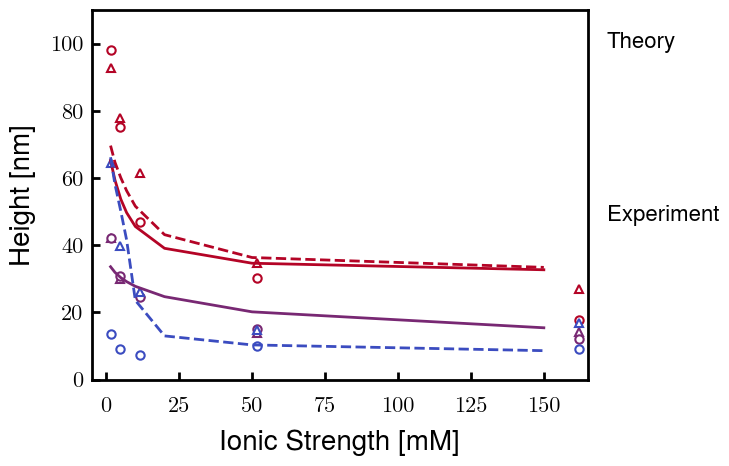

In [35]:
f, ax = plt.subplots(1,1)
for name, files in dfs.items():
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    name, kw = get_kw(name)
    plt.plot(files[0].cs, avg, **kw, label='_name')
    
name, kw = get_kw('Predicted NFL')
plt.plot(NFL.cs, NFL.thresh, **kw, label='_name') # 
name, kw = get_kw('Predicted NFM')
plt.plot(NFM.cs, NFM.thresh, **kw, label='_name') # 
name, kw = get_kw('Predicted pNFM')
plt.plot(pNFM.cs, pNFM.thresh, **kw, label='_name') # 
name, kw = get_kw('Predicted pNFH')
plt.plot(pNFH.cs, pNFH.thresh, **kw, label='_name') # 

# agscale_x = np.arange(1.5, 50, 0.1)
# agscale_y = np.power(agscale_x, -1/3)
# plt.plot(agscale_x, 9 *agscale_y, ':k') 
# plt.plot(agscale_x, 70 *agscale_y, ':k') 
# plt.plot(agscale_x, 120*agscale_y, ':k') 
# plt.text(1.7, 35, r'$\sim I^{-1/3}$', fontsize=16)

plt.text(0.93,0.80, 'Theory',     transform=f.transFigure, fontsize=16)
plt.text(0.93,0.44, 'Experiment', transform=f.transFigure, fontsize=16)
blank = Line2D([0],[0],ls='none')
handles = [blank, Line2D([0],[0], ls='--', c=warm_red, lw=2), Line2D([0],[0], ls='-', c=warm_red, lw=2)]
labels   = [ " "  , "pNFM", "NFM"] 
handles.extend([Line2D([0],[0], ls='--', c=cool_blue, lw=2), Line2D([0],[0], ls='-', c=cool_blue, lw=2)])
labels.extend([ "pNFH", "NFH"])    
handles.extend([blank, blank, Line2D([0],[0], ls='none', marker='^', c='k', markerfacecolor='w', lw=2), Line2D([0],[0], ls= 'none', marker='o', c='k', markerfacecolor='w', lw = 2)])
labels.extend([ " "  , " "  , "Phos", "Non-phos"])

plt.xlim(-5, 165)
plt.xscale('linear')
plt.ylim(0.0, 110)
plt.yscale('linear')
# plt.title(r"Pure Brush Heights", fontsize=18)
plt.ylabel('Height' ' [nm]')
plt.xlabel(r'Ionic Strength [mM]')
# plt.yticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100])
# plt.xticks([1, 5, 10, 20, 50], [1, 5, 10, 20, 50])
tjy.ticks()
# plt.legend(handles, labels, loc=0, bbox_to_anchor=(1.00, 1.00))
plt.show()

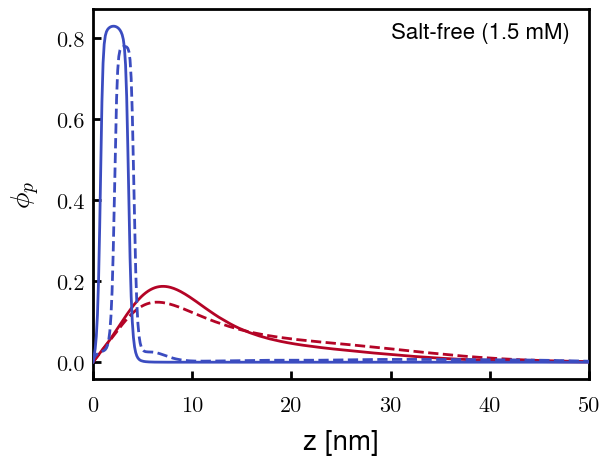

In [207]:
cs =  '002'
read_list = [GIT+"phpM2_c"+cs+".dat", GIT+"phM1_c"+cs+".dat", GIT+"phpH3_c"+cs+".dat", GIT+"phb5v20c3_c"+cs+".dat"]
block1 = None
block_Ni = [[10, 1], [9, 1], [6, 1], [7, 1]]
colors = [warm_red]*2 + [cool_blue]*2
zorders = [4]*4
lss = ['--', '-', '--', '-']
labs = ['_name']*4

fig, ax = plt.subplots(1,1) 
for k in range(len(read_list)):
  block_Nik = block_Ni[k]
  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']
  try: df = pd.read_csv(read_list[k], sep="\s+", skiprows=0, names=names)
  except HTTPError: 
      print('{} not found'.format(read_list[k]))
  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  lshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)
  rshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)

  # Plot total density (zorder 3)
  lshi[0] = phAr[0] + 0
  rshi[0] = phAr[0] + 0

  ax.plot(lshi[0], phAr.iloc[:,1], color = colors[k], ls = lss[k], zorder = zorders[k], alpha=1.0, label=labs[k])

  # Plot chain types (zorder 2)
  step = 1
  for j in range(len(block_Nik)):

    #Plot block densities (zorder 3)
    for i in range(block_Nik[j]):
      if (i == block1): ax.plot(lshi[0], ph1r.iloc[:,i+step], ':',  zorder=2, color=tjy.lighten_color(colors[k], 0.60),label='_Block')

    step += block_Nik[j]

plt.xlim([0, 50])
plt.text(30, 0.8, 'Salt-free (1.5 mM)', fontsize=16)
plt.ylabel(r'$\phi_p$')
plt.xlabel(r'z [nm]')
tjy.ticks()
plt.show()

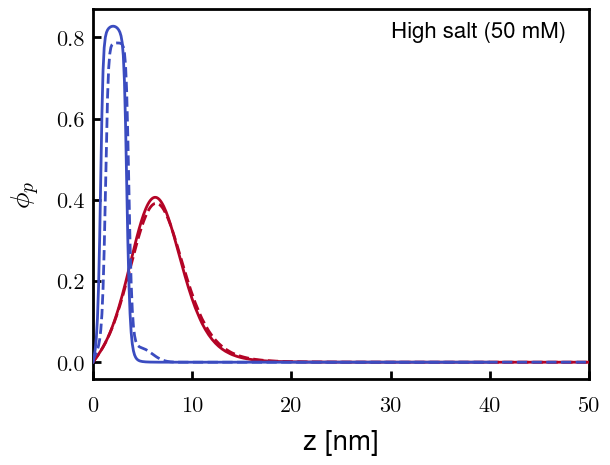

In [220]:
cs =  '050'
read_list = [GIT+"phpM2_c"+cs+".dat", GIT+"phM1_c"+cs+".dat", GIT+"phpH3_c"+cs+".dat", GIT+"phb5v20c3_c"+cs+".dat"]
block1 = None
block_Ni = [[10, 1], [9, 1], [6, 1], [7, 1]]
colors = [warm_red]*2 + [cool_blue]*2
zorders = [4]*4
lss = ['--', '-', '--', '-']
labs = ['_name']*4

fig, ax = plt.subplots(1,1) 
for k in range(len(read_list)):
  block_Nik = block_Ni[k]
  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']
  try: df = pd.read_csv(read_list[k], sep="\s+", skiprows=0, names=names)
  except HTTPError: 
      print('{} not found'.format(read_list[k]))
  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  lshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)
  rshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)

  # Plot total density (zorder 3)
  lshi[0] = phAr[0] + 0
  rshi[0] = phAr[0] + 0

  ax.plot(lshi[0], phAr.iloc[:,1], color = colors[k], ls = lss[k], zorder = zorders[k], alpha=1.0, label=labs[k])

  # Plot chain types (zorder 2)
  step = 1
  for j in range(len(block_Nik)):

    #Plot block densities (zorder 3)
    for i in range(block_Nik[j]):
      if (i == block1): ax.plot(lshi[0], ph1r.iloc[:,i+step], ':',  zorder=2, color=tjy.lighten_color(colors[k], 0.60),label='_Block')

    step += block_Nik[j]

plt.xlim([0, 50])
plt.text(30, 0.8, 'High salt (50 mM)', fontsize=16)
plt.ylabel(r'$\phi_p$')
plt.xlabel(r'z [nm]')
tjy.ticks()
plt.show()

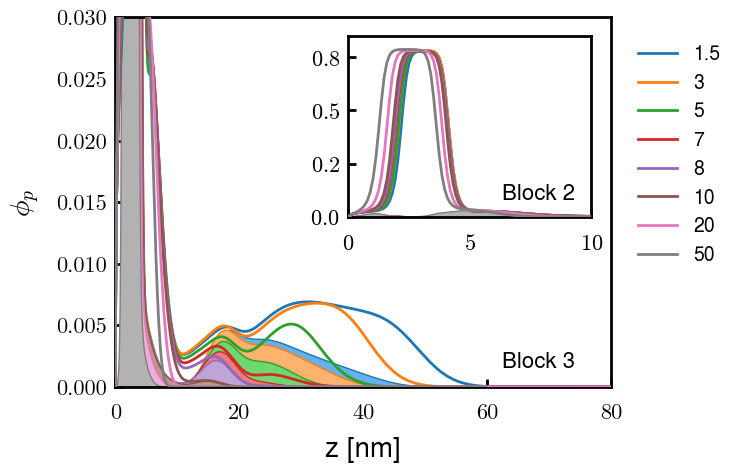

In [271]:
# css = ['002', '003', '005', '007', '008', '009', '010', '012', '015', '020', '050']
css = ['002', '003', '005', '007', '008', '010', '020', '050']
read_list = [GIT+"phpH3_c"+i+".dat" for i in css]
block1 = None
block_Ni = [[6, 1]]*len(read_list)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
zorders = [4]*len(read_list)
lss = ['-']*len(read_list)
labs = [1.5] + [int(i) for i in css[1:]]

fig, ax = plt.subplots(1,1) 
axins = ax.inset_axes([0.47, 0.46, 0.49, 0.49])
for k in range(len(read_list)):
  block_Nik = block_Ni[k]
  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']
  try: df = pd.read_csv(read_list[k], sep="\s+", skiprows=0, names=names)
  except HTTPError: 
      print('{} not found'.format(read_list[k]))
  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  lshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)
  rshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)

  # Plot total density (zorder 3)
  lshi[0] = phAr[0] + 0
  rshi[0] = phAr[0] + 0

  ax.plot(lshi[0], phAr.iloc[:,1], color = colors[k], ls = lss[k], zorder = zorders[k], alpha=1.0, label=labs[k])
  axins.plot(lshi[0], phAr.iloc[:,1], color = colors[k], ls = lss[k], zorder = zorders[k], alpha=1.0, label=labs[k])

  # Plot chain types (zorder 2)
  step = 1
  for j in range(len(block_Nik)):

    #Plot block densities (zorder 3)
    for i in range(block_Nik[j]):
      if (i == 1): axins.fill(lshi[0], ph1r.iloc[:,i+step], zorder=2, color=tjy.lighten_color(colors[k], 0.60), ec = colors[k], label='_Block')
      if (i == 2): ax.fill(lshi[0], ph1r.iloc[:,i+step], zorder=2, color=tjy.lighten_color(colors[k], 0.60), ec = colors[k], label='_Block')

    step += block_Nik[j]
    
class xScalarFormatterClass(ticker.ScalarFormatter):
    def _set_format(self):
        self.format = "$%d$" # New precision
class yScalarFormatterClass(ticker.ScalarFormatter):
    def _set_format(self):
        self.format = "$%.1f$" # New precision
axins.xaxis.set_major_formatter(xScalarFormatterClass(useMathText=True))
axins.yaxis.set_major_formatter(yScalarFormatterClass(useMathText=True))
axins.set_xlim([0, 10])
axins.set_ylim([0, 0.85])
ax.set_xlim([0, 80])
ax.set_ylim([0, 0.03])
plt.text(0.73, 0.50, 'Block 2', fontsize=16, transform=fig.transFigure, zorder=8)
plt.text(0.73, 0.15, 'Block 3', fontsize=16, transform=fig.transFigure)
plt.ylabel(r'$\phi_p$')
plt.xlabel(r'z [nm]')
plt.legend(bbox_to_anchor=(1.0, 1.0))
tjy.ticks()
plt.show()

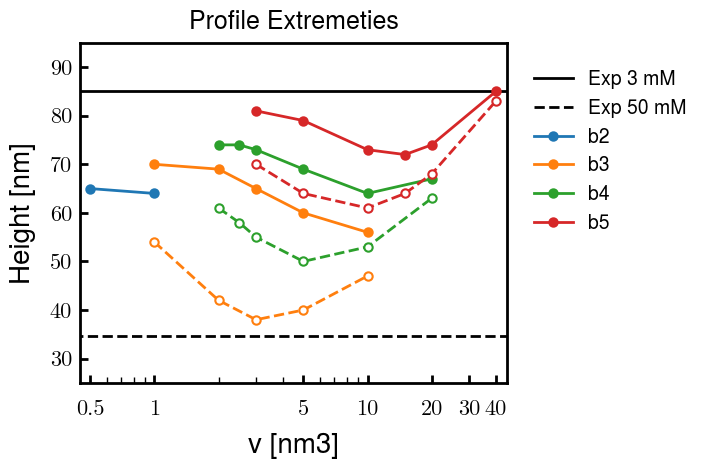

In [6]:
import EAD_p
import EAD_np
dfs = {'pNFM': [EAD_p.pMSA100_1, EAD_p.pMSA100_2]}

f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)

def get_kw(name): 
    if 'M' in name: c  = warm_red
    else:           c  = cool_blue
    if 'Predicted' in name: 
        ls = '-'
        m  = 'none'
    else:                   
        ls = 'none'
        if 'p' in name: m = '^'
        else:           m = 'o'
    return name, {'marker': m, 'color': c, 'ls': ls, 'markerfacecolor':'w'}

for name, files in dfs.items():
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    name, kw = get_kw(name)
    plt.plot(np.array([0.1,50]), 85*np.array([1,1]), 'k-', label='Exp 3 mM')
    plt.plot(np.array([0.1,50]), avg[3]*np.array([1,1]), 'k--', label='Exp 50 mM')
    
b2_3  = pd.DataFrame([[65, 0.50], [64, 1.00]], 
                     columns = ['H', 'v'])
b3_3  = pd.DataFrame([[70, 1.00], [69, 2.00], [65, 3], [60, 5], [56, 10]], 
                     columns = ['H', 'v'])
b4_3  = pd.DataFrame([[74, 2.00], [74, 2.50], [73, 3.00], [69, 5.00], [64, 10.00], [67, 20]], 
                     columns = ['H', 'v'])
b5_3 = pd.DataFrame([[81, 3.0], [79, 5.0], [73, 10], [72, 15], [74, 20], [85, 40]],
                     columns = ['H', 'v'])
    
b3_50 = pd.DataFrame([[54, 1.0], [42, 2.0], [38, 3], [40, 5], [47, 10]], 
                     columns = ['H', 'v'])
b4_50 = pd.DataFrame([[61, 2.0], [58, 2.5], [55, 3.0], [50, 5.0], [53, 10], [63, 20]], 
                     columns = ['H', 'v'])
b5_50 = pd.DataFrame([[70, 3.0], [64, 5.0], [61, 10], [64, 15], [68, 20], [83, 40]],
                     columns = ['H', 'v'])

plt.plot(b2_3.v, b2_3.H, 'o-', label='b2', c='C0')
plt.plot(b3_3.v, b3_3.H, 'o-', label='b3', c='C1')
plt.plot(b4_3.v, b4_3.H, 'o-', label='b4', c='C2')
plt.plot(b5_3.v, b5_3.H, 'o-', label='b5', c='C3')

plt.plot(b3_50.v, b3_50.H, 'o--', markerfacecolor='w', c='C1')
plt.plot(b4_50.v, b4_50.H, 'o--', markerfacecolor='w', c='C2')
plt.plot(b5_50.v, b5_50.H, 'o--', markerfacecolor='w', c='C3')
    
plt.xlim(0.45, 45)
plt.xscale('log')
plt.xticks([0.5, 1, 5, 10, 20, 30, 40], [0.5, 1, 5, 10, 20, 30, 40])
plt.ylim(25, 95)
plt.title(r"Profile Extremeties", fontsize=18)
plt.ylabel('Height' ' [nm]')
plt.xlabel('v [nm3]')
tjy.ticks()
plt.legend(loc=2, bbox_to_anchor=(1.00, 1.00))
plt.show()

sigma_target: 0.02, sigma_calc: 0.0241 (20.28%), R: 4.00
nx (odd): 3, Lx: 12.40
ny (even) : 4, Ly: 20.80
Deltax: 30, Deltay: 17
Nx: 31, Ny: 52


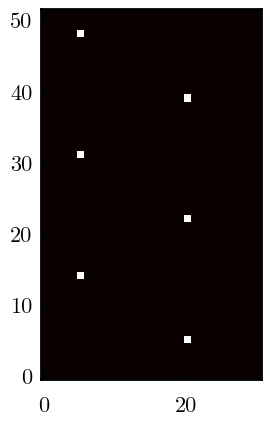

In [368]:
# PBC
import math 

sigma = 0.02 # c/nm2
Lx, Ly = 15, 25  # nm
dx = 0.4 # nm
dy = dx
R = math.floor( np.sqrt(2/(3*np.sqrt(3)*sigma)) / dx ) * dx
s3R  = math.floor( np.sqrt(3)*R / dx ) * dx
s34R = math.floor( np.sqrt(3)*R/4 / dx ) * dx
Deltax, Deltay = int(3*R/dx), int(s3R/dy)

nx = 2*math.floor(Lx/(3*R))
if (nx%2)==0: nx += 1 # nx must be odd
Lx = Deltax*dx*(nx-1)/2+dx

ny = math.floor(Ly/(s3R))
if (ny%2)==1: ny += 1 # ny must be even
Ly = Deltay*dy*(ny-1)+dy

Nx = int(Deltax*(nx-1)/2)+1
Ny = int(Deltay*(ny-1))+1

s_calc = 2/(3*np.sqrt(3)*R**2)
print("sigma_target: {}, sigma_calc: {:.4f} ({:.2f}%), R: {:.2f}".format(sigma, s_calc, 100*(s_calc/sigma-1.0), R))
print("nx (odd): {}, Lx: {:.2f}".format(nx, Lx))
print("ny (even) : {}, Ly: {:.2f}".format(ny, Ly))
print("Deltax: {}, Deltay: {}".format(Deltax, Deltay))
print("Nx: {}, Ny: {}".format(Nx, Ny))

SURF = np.zeros((Nx, Ny))
s1 = (math.floor(R/2/dx)*dx, math.floor(Ly/dy - s34R/dy)*dy)
s2 = (math.floor(2*R/dx)*dx, s34R+dx)

x1 = int(s1[0]/dx)
y1 = int(s1[1]/dy)
while (x1*dx < Lx):
    y1 = int(s1[1]/dy)
    # print(x1, y1)
    SURF[x1][y1] = 1.0
    while (y1*dy > 0):
        # print(x1, y1)
        SURF[x1][y1] = 1.0
        y1 -= Deltay
    x1 += Deltax
    # print('x1*dx new ', x1*dx)
    
x2, y2 = int(s2[0]/dx), int(s2[1]/dy)
SURF[x2][y2] = 1.0
while (x2*dx < Lx):
    y2 = int(s2[1]/dy)
    # print(x2, y2)
    SURF[x2][y2] = 1.0
    while (y2*dy < Ly):
        # print(x2, y2)
        SURF[x2][y2] = 1.0
        y2 += Deltay
    x2 += Deltax
    # print('x2*dx new ', x2*dx)

plt.figure()
plt.imshow(SURF.transpose(), cmap='hot', origin='lower')
# plt.xlabel('x')
# plt.ylabel('y')
tjy.ticks()

6.800000000000001
CHECK 25.5
sigma_target: 0.02, sigma_calc: 0.0241 (20.28%), R: 4.00
nx (odd): 5, Lx: 24.40
ny (even) : 4, Ly: 20.80
Deltax: 30, Deltay: 17
Nx: 61, Ny: 52
////////
nx_2 (odd): 3.0, Lx_2: 12.40
ny_2 (even) : 2.0, Ly_2: 10.60
Nx_2: 31, Ny_2: 26


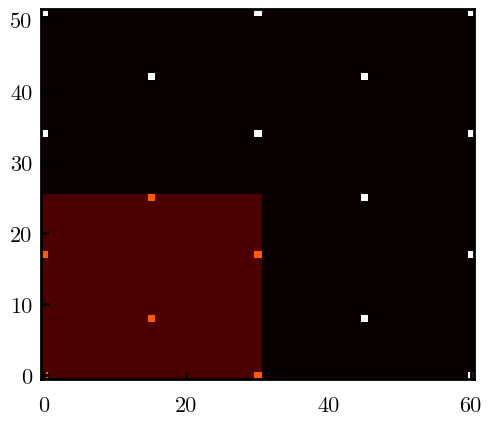

In [19]:
# NBC
import math
sigma = 0.02 # c/nm2
Lx, Ly = 30, 30# nm
dx = 0.40 #nm
dy = dx

R = math.floor( np.sqrt(2/(3*np.sqrt(3)*sigma)) / dx ) * dx
s3R = math.floor( np.sqrt(3)*R / dx ) * dx
Deltax, Deltay = int(3*R/dx), int(s3R/dy)

nx = 2*math.floor(Lx/(3*R))
if (nx%2)==0: nx += 1 # nx must be odd
nx_2 = (nx-1)/2 + 1
Lx   = Deltax*dx*(nx-1)  /2+dx
Lx_2 = Deltax*dx*(nx_2-1)/2+dx

print(s3R)
ny = math.floor(Ly/(s3R))
if (ny%2)==1: ny += 1 # ny must be even
ny_2 = ny/2
Ly   =     Deltay*dy*(ny-1)  +dy
Ly_2 = 1.5*Deltay*dy*(ny_2-1)+dy

Nx   = int(    Deltax*(nx-1)  /2) +1
Ny   = int(    Deltay*(ny-1))     +1
Nx_2 = int(    Deltax*(nx_2-1)/2) +1
Ny_2 = math.floor(1.5*Deltay*(ny_2-1))   +1
print("CHECK {}".format(1.5*Deltay*(ny_2-1)))

s_calc = 2/(3*np.sqrt(3)*R**2)
print("sigma_target: {}, sigma_calc: {:.4f} ({:.2f}%), R: {:.2f}".format(sigma, s_calc, 100*(s_calc/sigma-1.0), R))
print("nx (odd): {}, Lx: {:.2f}".format(nx, Lx))
print("ny (even) : {}, Ly: {:.2f}".format(ny, Ly))
print("Deltax: {}, Deltay: {}".format(Deltax, Deltay))
print("Nx: {}, Ny: {}".format(Nx, Ny))
print("////////")
print("nx_2 (odd): {}, Lx_2: {:.2f}".format(nx_2, Lx_2))
print("ny_2 (even) : {}, Ly_2: {:.2f}".format(ny_2, Ly_2))
print("Nx_2: {}, Ny_2: {}".format(Nx_2, Ny_2))

SURF = np.zeros((Nx, Ny))
s1 = (0, Ly-dy) 
s2 = (math.floor(3*R/2/dx)*dx, math.floor(s3R/2/dy)*dy)

x1, y1 = int(s1[0]/dx), int(s1[1]/dy)
while (x1*dx <= Lx):
    y1 = int(s1[1]/dy)
    SURF[x1][y1] = 1.0
    while (y1*dy >= 0):
        SURF[x1][y1] = 1.0
        y1 -= Deltay
    x1 += Deltax
    
x2, y2 = int(s2[0]/dx), int(s2[1]/dy)
while (x2*dx <= Lx):
    y2 = int(s2[1]/dy)
    SURF[x2][y2] = 1.0
    while (y2*dy <= Ly):
        SURF[x2][y2] = 1.0
        y2 += Deltay
    x2 += Deltax
######################################    
s1 = (0, 0) 
s2 = (math.floor(3*R/2/dx)*dx, math.floor(s3R/2/dy)*dy)
SURF[np.ix_(np.arange(0,Nx_2), np.arange(0,Ny_2))] = 0.1  # not sure how ix_ works, error when ny = 2
x1, y1 = int(s1[0]/dx), int(s1[1]/dy)
while (x1*dx <= Lx_2):
    y1 = int(s1[1]/dy)
    SURF[x1][y1] = 0.5
    while (y1*dy <= Ly_2):
        SURF[x1][y1] = 0.5
        y1 += Deltay
    x1 += Deltax
    
x2, y2 = int(s2[0]/dx), int(s2[1]/dy)
while (x2*dx <= Lx_2):
    y2 = int(s2[1]/dy)
    SURF[x2][y2] = 0.5
    while (y2*dy <= Ly_2):
        SURF[x2][y2] = 0.5
        y2 += Deltay
    x2 += Deltax
plt.figure()
plt.imshow(SURF.transpose(), cmap='hot', origin='lower')
tjy.ticks()

In [18]:
print(SURF[0][0])
with np.printoptions(threshold=np.inf, linewidth=200):
    print(SURF.transpose())

0.5
[[0.5 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1